In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [274]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

print('Number of training observations:', len(train_data))
train_data.head()

Number of training observations: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [275]:
print('Number of testing observations:', len(test_data))
test_data.head()

Number of testing observations: 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA (Exploratory Data Analysis)

## Check for empty/NaN Values

In [276]:
# check for empty values on training set
for col_headers in train_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, train_data[col_headers].isnull().sum()))

Number of empty values on "PassengerId" column: 0
Number of empty values on "Survived" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 177
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 0
Number of empty values on "Cabin" column: 687
Number of empty values on "Embarked" column: 2


In [277]:
# check for empty values on test set
for col_headers in test_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, test_data[col_headers].isnull().sum()))

Number of empty values on "PassengerId" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 86
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 1
Number of empty values on "Cabin" column: 327
Number of empty values on "Embarked" column: 0


## Fill in Empty Values

In [278]:
# fill in empty values in 'Embarked' column
EMBARKED_MODE = train_data['Embarked'].mode()
train_data['Embarked'] = train_data['Embarked'].fillna(EMBARKED_MODE[0])
# fill in empty values in 'Fare' column
FARE_MEAN = train_data['Fare'].mean()
train_data['Fare'] = train_data['Fare'].fillna(FARE_MEAN)

# check for empty values on training set
print('--After filling in empty values on training data--')
for col_headers in train_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, train_data[col_headers].isnull().sum()))

--After filling in empty values on training data--
Number of empty values on "PassengerId" column: 0
Number of empty values on "Survived" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 177
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 0
Number of empty values on "Cabin" column: 687
Number of empty values on "Embarked" column: 0


In [279]:
# fill in empty values in 'Fare' column
FARE_MEAN = test_data['Fare'].mean()
test_data['Fare'] = test_data['Fare'].fillna(FARE_MEAN)

# check for empty values on training set
print('--After filling in empty values on training data--')
for col_headers in test_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, test_data[col_headers].isnull().sum()))

--After filling in empty values on training data--
Number of empty values on "PassengerId" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 86
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 0
Number of empty values on "Cabin" column: 327
Number of empty values on "Embarked" column: 0


In [280]:
# replace 'male' values to 0 and 'female' values to 1
train_data = train_data.replace({'male': 0, 'female': 1})
test_data = test_data.replace({'male': 0, 'female': 1})

In [281]:
# get one-hot encoding for 'Embarked' column
train_embarked = pd.get_dummies(train_data['Embarked'])
for c in train_embarked.columns:
    train_data[c] = train_embarked[c]
    
test_embarked = pd.get_dummies(test_data['Embarked'])
for c in test_embarked.columns:
    test_data[c] = test_embarked[c]

## Survival Rate

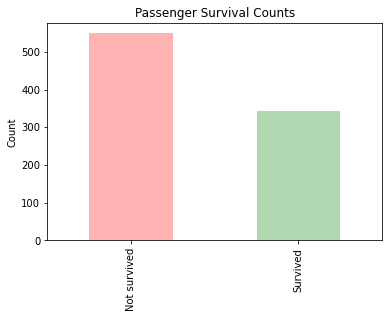

In [282]:
# visualize the number of survived passengers
LABEL = ['Not survived', 'Survived']
df_survived = train_data[['Survived']].value_counts()
df_survived.plot(kind='bar', color=['red', 'green'], alpha=.3)

plt.title('Passenger Survival Counts')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(np.arange(2), LABEL)
plt.show()

## Gender

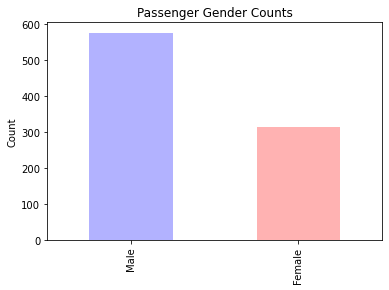

In [283]:
# visualize the count of passenger genders
GENDER = ['Male', 'Female']
df_sex = train_data[['Sex']].value_counts()
df_sex.plot(kind='bar', color=['blue', 'red'], alpha=.3)

plt.title('Passenger Gender Counts')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(np.arange(2), GENDER)

plt.show()

In [284]:
# group the passengers who survived by gender
df_survived_gender = train_data[['Survived', 'Sex']].value_counts()
df_survived_gender = pd.pivot_table(df_survived_gender.to_frame(), values=0, index=['Survived', 'Sex'], aggfunc=np.sum)
df_survived_gender = df_survived_gender.reset_index()
df_survived_gender = df_survived_gender.rename(columns={0: 'Counts'})

df_survived_gender

,Survived,Sex,Counts
0,0,0,468
1,0,1,81
2,1,0,109
3,1,1,233


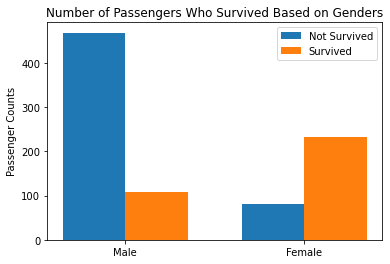

In [285]:
# number of passengers who didn't survive grouped by gender
x = np.arange(len(GENDER))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.bar(x - width/2, df_survived_gender[df_survived_gender['Survived'] == 0]['Counts'], width)
ax.bar(x + width/2, df_survived_gender[df_survived_gender['Survived'] == 1]['Counts'], width)
# plt.xticks(np.arange(2), GENDER)
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Genders')
ax.set_xticks(x)
ax.set_xticklabels(GENDER)
ax.legend(['Not Survived', 'Survived'])

plt.show()

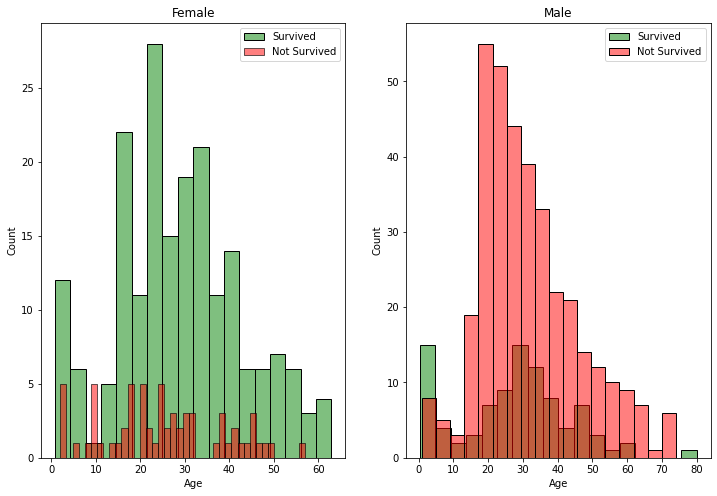

In [286]:
### passengers grouped by gender and age
female = train_data[train_data['Sex'] == 1]
male = train_data[train_data['Sex'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12,8))
ax = sns.histplot(female[female['Survived'] == 1].Age.dropna(), label='Survived', bins=18, kde=False, ax=axes[0], color='green', alpha=0.5)
ax = sns.histplot(female[female['Survived'] == 0].Age.dropna(), label='Not Survived', bins=40, kde=False, ax=axes[0], color='red', alpha=0.5)
axes[0].legend()
axes[0].set_title('Female')

ax = sns.histplot(male[male['Survived'] == 1].Age.dropna(), label='Survived', bins=18, kde=False, ax=axes[1], color='green', alpha=0.5)
ax = sns.histplot(male[male['Survived'] == 0].Age.dropna(), label='Not Survived', bins=18, kde=False, ax=axes[1], color='red', alpha=0.5)
ax.legend()
ax.set_title('Male')

plt.show()

## Ticket Class (PClass)

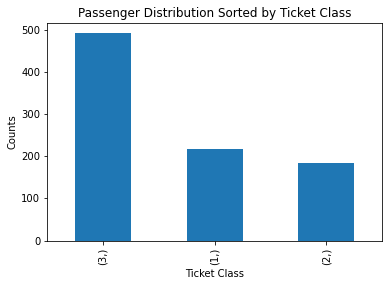

In [287]:
# visualize the count of ticket class
df_pclass = train_data[['Pclass']].value_counts()
df_pclass.plot(kind='bar')

plt.title('Passenger Distribution Sorted by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Counts')

plt.show()

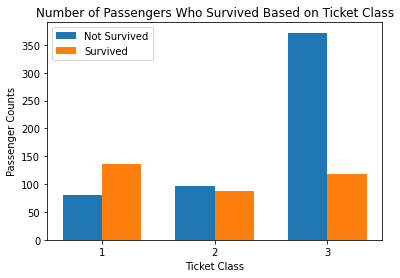

In [288]:
# visualize passengers who survived based on ticket class
TICKET = ['1', '2', '3']
df_survived_pclass = train_data[['Pclass', 'Survived']].value_counts()
df_survived_pclass  = pd.pivot_table(df_survived_pclass.to_frame(), values=0, index=['Survived', 'Pclass'], aggfunc=np.sum)
df_survived_pclass  = df_survived_pclass.reset_index()
df_survived_pclass  = df_survived_pclass.rename(columns={0: 'Counts'})

fig, ax = plt.subplots()
x = np.arange(len(TICKET))

ax.bar(x - width/2, df_survived_pclass[df_survived_pclass['Survived'] == 0]['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_survived_pclass[df_survived_pclass['Survived'] == 1]['Counts'], width, label='Survived')

ax.set_xlabel('Ticket Class')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Ticket Class')
ax.set_xticks(x)
ax.set_xticklabels(TICKET)
ax.legend()

plt.show()
# df_survived_pclass.plot(kind='bar')
# plt.title('Number of Passengers Who Survived Based on Ticket Class')
# plt.ylabel('Passengers Survived')
# plt.xlabel('Ticket Class')

# plt.show()

## Age

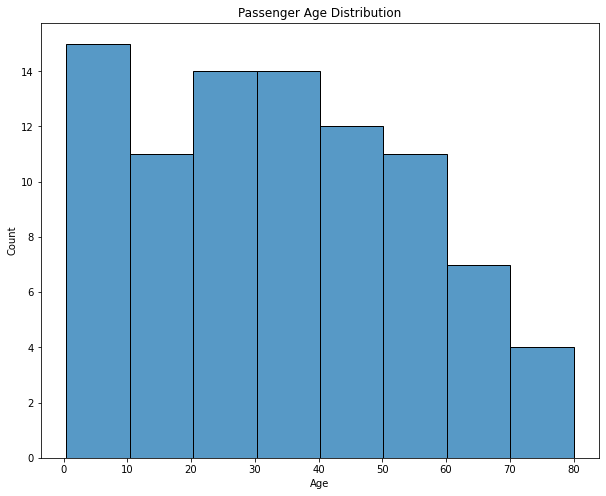

In [289]:
# visualize age distribution
df_age = train_data[['Age']].value_counts()
plt.figure(figsize=(10,8))
sns.histplot(data=df_age, x='Age')

plt.title('Passenger Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Counts')

plt.show()

## Embarked

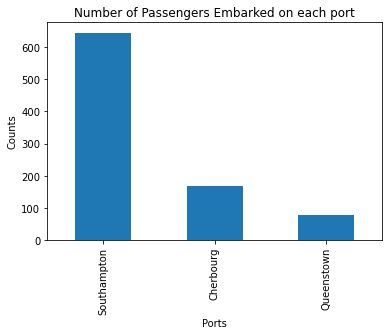

In [290]:
# visualize the number of passengers based on port of embarktion
PORTS = ['Southampton', 'Cherbourg', 'Queenstown']
df_port = train_data[['Embarked']].value_counts()
df_port.plot(kind='bar')

plt.title('Number of Passengers Embarked on each port')
plt.xlabel('Ports')
plt.ylabel('Counts')
plt.xticks(np.arange(3), PORTS)

plt.show()

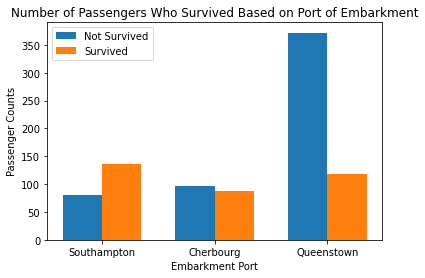

In [291]:
df_survived_port = train_data[['Embarked', 'Survived']].value_counts()
df_survived_port  = pd.pivot_table(df_survived_port.to_frame(), values=0, index=['Survived', 'Embarked'], aggfunc=np.sum)
df_survived_port  = df_survived_port.reset_index()
df_survived_port  = df_survived_port.rename(columns={0: 'Counts'})

fig, ax = plt.subplots()
x = np.arange(len(PORTS))

ax.bar(x - width/2, df_survived_pclass[df_survived_pclass['Survived'] == 0]['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_survived_pclass[df_survived_pclass['Survived'] == 1]['Counts'], width, label='Survived')

ax.set_xlabel('Embarkment Port')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Port of Embarkment')
ax.set_xticks(x)
ax.set_xticklabels(PORTS)
ax.legend()

plt.show()

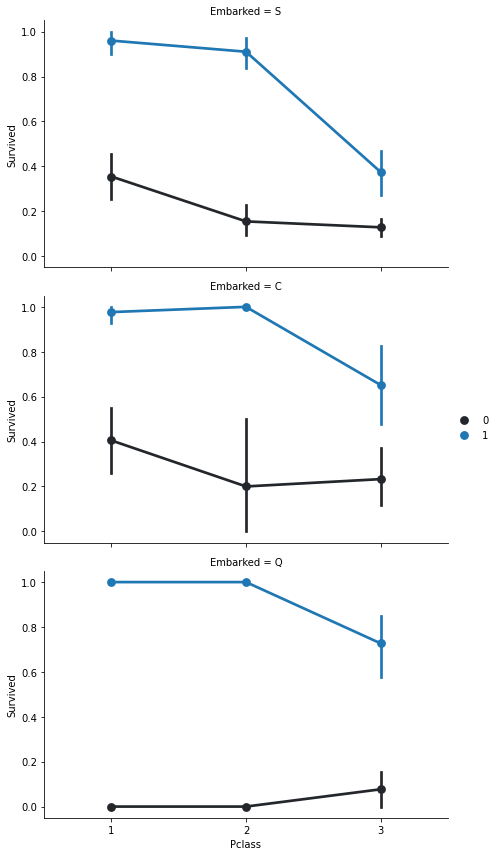

In [292]:
facet_grid = sns.FacetGrid(train_data, row='Embarked', height=4, aspect=1.6)
facet_grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None)
facet_grid.add_legend()

plt.show()

## Number of Siblings/Spouses (SibSp)

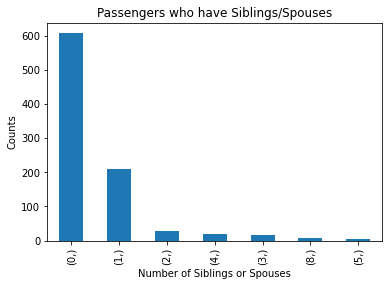

In [293]:
# visualize the number of passengers who have siblings or spouses
df_sibsp = train_data[['SibSp']].value_counts()
df_sibsp.plot(kind='bar')

plt.title('Passengers who have Siblings/Spouses')
plt.xlabel('Number of Siblings or Spouses')
plt.ylabel('Counts')

plt.show()

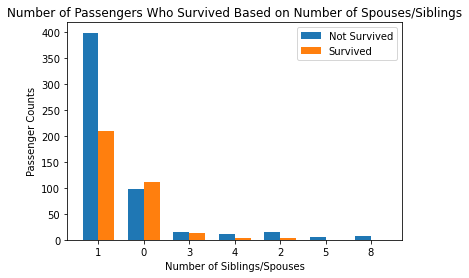

In [296]:
# visualize passengers who have siblings/spouses against survival rate
SIBSP = train_data.SibSp.unique()

df_survived_sibsp = train_data[['SibSp', 'Survived']].value_counts()
df_survived_sibsp = pd.pivot_table(df_survived_sibsp.to_frame(), values=0, index=['Survived', 'SibSp'], aggfunc=np.sum)
df_survived_sibsp = df_survived_sibsp.reset_index()
df_survived_sibsp = df_survived_sibsp.rename(columns={0: 'Counts'})

df_temp_sibsp = df_survived_sibsp[df_survived_sibsp['Survived'] == 0]
df_temp_sibsp2 = df_survived_sibsp[df_survived_sibsp['Survived'] == 1]

df_temp_sibsp.set_index('SibSp', inplace=True)
df_temp_sibsp2.set_index('SibSp', inplace=True)
d = pd.DataFrame([[1, 0], [1, 0]], columns=['Survived','Counts'])
df_temp_sibsp2 = df_temp_sibsp2.append(d)
# df_temp_sibsp2.loc[5] = [1,0]
# df_temp_sibsp2.loc[8] = [1,0]

# for i in range(len(df_temp_sibsp)):
#     df_temp_sibsp2.loc[i] = 0
    
# df_temp_sibsp2 = df_temp_sibsp2.sort_index()

# for i in range(7, len(df_temp_sibsp2)):
#     df_temp_sibsp.loc[i] = 0

fig, ax = plt.subplots()
x = np.arange(len(SIBSP))

ax.bar(x - width/2, df_temp_sibsp['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_temp_sibsp2['Counts'], width, label='Survived')

ax.set_xlabel('Number of Siblings/Spouses')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Number of Spouses/Siblings')
ax.set_xticks(x)
ax.set_xticklabels(SIBSP)
ax.legend()

plt.show()

## Number of Parents/Children (Parch)

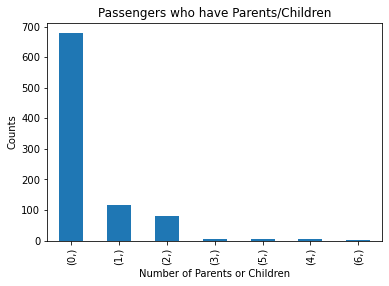

In [297]:
# visualize the number of passengers who have parents or children
df_parch = train_data[['Parch']].value_counts()
df_parch.plot(kind='bar')

plt.title('Passengers who have Parents/Children')
plt.xlabel('Number of Parents or Children')
plt.ylabel('Counts')

plt.show()

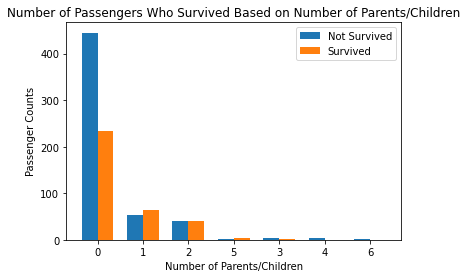

In [298]:
# visualize passengers who have parents/children against survival rate
PARCH = train_data.Parch.unique()

df_survived_parch = train_data[['Parch', 'Survived']].value_counts()
df_survived_parch = pd.pivot_table(df_survived_parch.to_frame(), values=0, index=['Survived', 'Parch'], aggfunc=np.sum)
df_survived_parch = df_survived_parch.reset_index()
df_survived_parch = df_survived_parch.rename(columns={0: 'Counts'})

df_temp_parch = df_survived_parch[df_survived_parch['Survived'] == 0]
df_temp_parch2 = df_survived_parch[df_survived_parch['Survived'] == 1]

df_temp_parch.set_index('Parch', inplace=True)
df_temp_parch2.set_index('Parch', inplace=True)
d = pd.DataFrame([[1, 0], [1, 0]], columns=['Survived','Counts'])
df_temp_parch2 = df_temp_parch2.append(d)

# for i in range(len(df_temp_sibsp)):
#     df_temp_sibsp2.loc[i] = 0
    
# df_temp_sibsp2 = df_temp_sibsp2.sort_index()

# for i in range(7, len(df_temp_sibsp2)):
#     df_temp_sibsp.loc[i] = 0

fig, ax = plt.subplots()
x = np.arange(len(PARCH))

ax.bar(x - width/2, df_temp_parch['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_temp_parch2['Counts'], width, label='Survived')

ax.set_xlabel('Number of Parents/Children')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Number of Parents/Children')
ax.set_xticks(x)
ax.set_xticklabels(PARCH)
ax.legend()

plt.show()

## Fare

Text(0, 0.5, 'Counts')

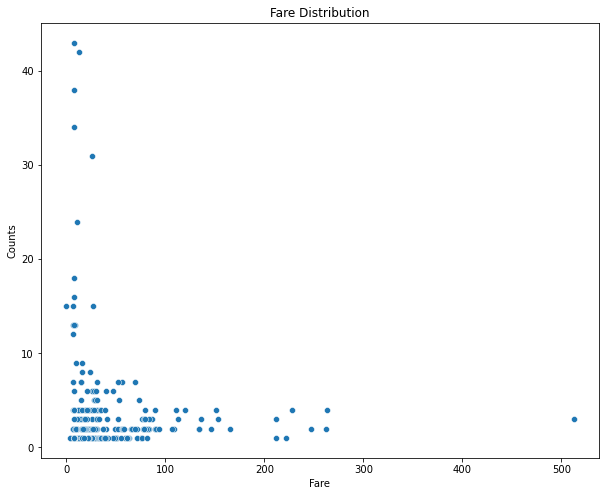

In [299]:
# visualize fare distribution
df_fare = train_data[['Fare']].value_counts()
df_fare = df_fare.reset_index()

plt.figure(figsize=(10,8))
plt.title('Fare Distribution')
sns.scatterplot(x=df_fare['Fare'], y=df_fare[0], data=df_fare)
plt.ylabel('Counts')

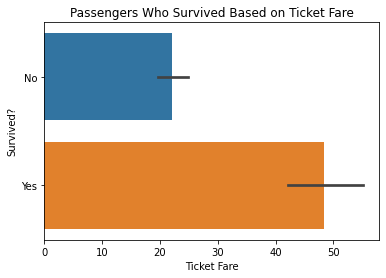

In [300]:
# visualize relattionship between fare against survival
SURVIVED = ['No', 'Yes']

df_survived_fare = train_data[['Fare', 'Survived']]
sns.barplot(x=df_survived_fare['Fare'], y=df_survived_fare['Survived'], data=df_survived_fare, orient='h')

plt.title('Passengers Who Survived Based on Ticket Fare')
plt.yticks(np.arange(2), SURVIVED)
plt.ylabel('Survived?')
plt.xlabel('Ticket Fare')

plt.show()

## Pearson Correlation

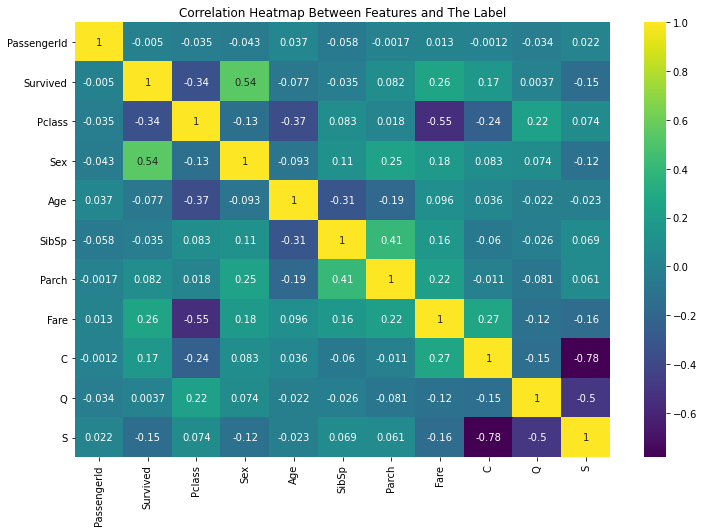

In [233]:
# pearson correlation against features and label
train_corr = train_data.corr()
plt.figure(figsize=(12,8))

sns.heatmap(train_corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap Between Features and The Label')

plt.show()

## Feature Engineering

In [301]:
import re

In [302]:
title_list = []
for p_name in train_data['Name']:
    title = re.findall(r'(Mr|Mrs|Ms|Miss|Mister|Lady|Sir|Dr|Mme|Master|Major|Rev|Don|Col|Mlle|Capt|Countess|Jonkheer|Dona)\.', p_name)
    title_list.append(title[0])
    
train_data['Title'] = title_list

title_list = []
for p_name in test_data['Name']:
    title = re.findall(r'(Mr|Mrs|Ms|Miss|Mister|Lady|Sir|Dr|Mme|Master|Major|Rev|Don|Col|Mlle|Capt|Countess|Jonkheer|Dona)\.', p_name)
    title_list.append(title[0])
    
test_data['Title'] = title_list

In [321]:
df_temp

,Survived,Title,Counts
0,0,Capt,1
1,0,Col,1
2,0,Don,1
3,0,Dr,4
4,0,Jonkheer,1
5,0,Major,1
6,0,Master,17
7,0,Miss,55
8,0,Mr,436
9,0,Mrs,26


In [327]:
TITLE = train_data.Title.unique()

df_survived_title = train_data[['Title', 'Survived']].value_counts()
df_survived_title = pd.pivot_table(df_survived_title.to_frame(), values=0, index=['Survived', 'Title'], aggfunc=np.sum)
df_survived_title = df_survived_title.reset_index()
df_survived_title = df_survived_title.rename(columns={0: 'Counts'})

df_temp = df_survived_title[df_survived_title['Survived'] == 0]
df_temp2 = df_survived_title[df_survived_title['Survived'] == 1]

for c in df_temp.Title.unique():
    if c not in df_temp2.Title.unique():
        d = pd.DataFrame([[1, c, 0]], columns=['Survived', 'Title', 'Counts'])
        df_temp2 = df_temp2.append(d)
        
for c in df_temp2.Title.unique():
    if c not in df_temp.Title.unique():
        d = pd.DataFrame([[0, c, 0]], columns=['Survived', 'Title', 'Counts'])
        df_temp = df_temp.append(d)

df_temp.set_index('Title', inplace=True)
df_temp2.set_index('Title', inplace=True)

In [328]:
len(df_temp) == len(df_temp2)

True

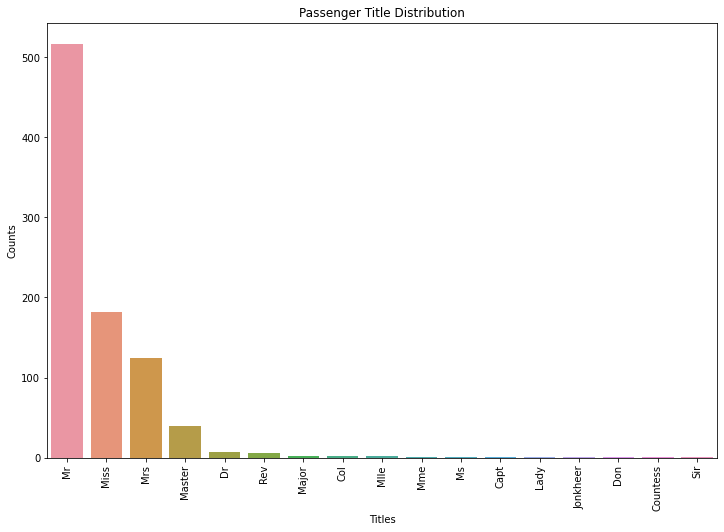

In [329]:
df_title = train_data[['Title']].value_counts()
df_title = df_title.to_frame()
df_title = df_title.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='Title', y=0, data=df_title)

plt.title('Passenger Title Distribution')
plt.xlabel('Titles')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

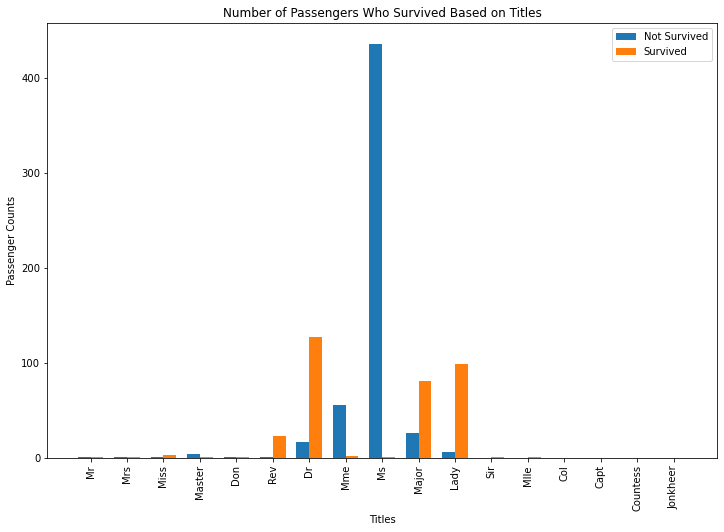

In [330]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.arange(len(TITLE))

ax.bar(x - width/2, df_temp['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_temp2['Counts'], width, label='Survived')

ax.set_xlabel('Titles')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Titles')
ax.set_xticks(x)
ax.set_xticklabels(TITLE)
ax.legend()

plt.xticks(rotation=90)
plt.show()

## Model Building

In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [241]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'Title'],
      dtype='object')

In [242]:
# build a prediction model
X = train_data[['Pclass', 'Sex', 'SibSp', 'Parch']].to_numpy()
X_test = test_data[['Pclass', 'Sex', 'SibSp', 'Parch']].to_numpy()
X2 = train_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()
X_test2 = test_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()
X3 = train_data[['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()
X_test3 = test_data[['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()

y = train_data['Survived'].to_numpy()

model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1)
model.fit(X3, y)
train_preds = model.predict(X3)
print('Training accuracy: {:.2f}%'.format(accuracy_score(y, train_preds) * 100))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X3, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validatiton accuracy: {:.2f}%'.format(np.mean(n_scores) * 100))

Training accuracy: 82.04%
Cross-validatiton accuracy: 80.32%


## Submission

In [244]:
test_preds = model.predict(X_test3)
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_preds})
output.to_csv('titanic_embarked_one_hot_rf_submission.csv', index=False)
print("Submission saved!")

Submission saved!


In [ ]:
import requests
import io
import re

url="https://github.com/thisisjasonjafari/my-datascientise-handcode/raw/master/005-datavisualization/titanic.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
 
test_labels = c
test = pd.read_csv('./data/test.csv')

# warnings.filterwarnings('ignore')

for i, name in enumerate(test_labels['name']):
    if '"' in name:
        test_labels['name'][i] = re.sub('"', '', name)
        
for i, name in enumerate(test['Name']):
    if '"' in name:
        test['Name'][i] = re.sub('"', '', name)
        
survived = []

for name in test['Name']:
    survived.append(int(test_labels.loc[test_labels['name'] == name]['survived'].values[-1]))

    
# submission = pd.read_csv('./data/gender_submission.csv')
# submission['Survived'] = survived
# submission.to_csv('submission_titanic.csv', index=False)


## with FastAI

In [245]:
import fastai2
import fastcore
from fastai2.tabular.all import *

In [246]:
fastcore.__version__

'0.1.35'

In [247]:
# download the extended dataset from: https://www.kaggle.com/pavlofesenko/titanic-extended?select=train.csv
train_df = pd.read_csv('./data/train-extended.csv')
test_df = pd.read_csv('./data/test-extended.csv')

In [248]:
train_df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
dtype: object

In [249]:
grouped_columns = train_df.columns.to_series().groupby(train_df.dtypes).groups
grouped_columns

{int64: ['PassengerId', 'Pclass', 'SibSp', 'Parch'], float64: ['Survived', 'Age', 'Fare', 'WikiId', 'Age_wiki', 'Class'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body']}

In [250]:
cont_types = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'WikiId', 'Age_wiki', 'Class']
cat_types = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body']

In [251]:
splits = RandomSplitter(valid_pct=.2)(range_of(train_df))
tabular_pandas = TabularPandas(train_df, procs=[Categorify, FillMissing, Normalize],
                              cat_names=cat_types,
                              cont_names = cont_types,
                              y_names='Survived',
                              splits=splits)

In [252]:
print('Number of training rows:', len(tabular_pandas.train.xs))
print('Training columns:', len(tabular_pandas.train.xs.columns))
tabular_pandas.train.xs

Number of training rows: 713
Training columns: 24


,Name,Sex,Ticket,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Lifeboat,...,Class_na,PassengerId,Pclass,SibSp,Parch,Age,Fare,WikiId,Age_wiki,Class
619,280,2,254,0,3,262,154,4,66,0,...,1,0.686461,-0.366085,-0.475673,-0.485325,-0.236618,-0.432896,-0.637044,-0.216491,-0.361559
478,426,2,412,0,3,404,433,4,160,0,...,1,0.135718,0.831249,-0.475673,-0.485325,-0.546412,-0.490891,0.684856,-0.505563,0.831920
586,396,2,130,0,3,374,356,4,148,0,...,1,0.557563,-0.366085,-0.475673,-0.485325,1.389798,-0.345296,-0.515672,1.301134,-0.361559
833,50,2,343,0,3,51,220,4,20,0,...,1,1.522340,0.831249,-0.475673,-0.485325,-0.468964,-0.484401,-0.006437,-0.433295,0.831920
739,575,2,365,0,3,550,393,4,42,0,...,1,1.155178,0.831249,-0.475673,-0.485325,-0.081722,-0.483591,1.051610,0.217116,0.831920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,568,1,445,0,2,541,6,3,163,9,...,1,-0.789999,0.831249,0.409849,-0.485325,-0.081722,-0.335563,1.022586,-0.794634,0.831920
165,294,2,424,0,3,275,360,4,55,21,...,1,-1.086854,0.831249,-0.475673,1.892934,-1.553241,-0.237744,0.439473,-1.445045,0.831920
266,632,2,250,0,3,600,424,4,47,0,...,1,-0.692350,0.831249,3.066416,0.703805,-1.011103,0.135285,1.180898,-0.939170,0.831920
347,208,1,484,0,3,0,0,0,0,0,...,2,-0.375966,0.831249,0.409849,-0.485325,-0.081722,-0.323883,0.021267,-0.071956,0.831920


In [253]:
print('Number of validation rows:', len(tabular_pandas.valid.xs))
print('Validation columns:', len(tabular_pandas.valid.xs.columns))
tabular_pandas.valid.xs

Number of validation rows: 178
Validation columns: 24


,Name,Sex,Ticket,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Lifeboat,...,Class_na,PassengerId,Pclass,SibSp,Parch,Age,Fare,WikiId,Age_wiki,Class
473,402,1,629,91,1,380,276,4,148,3,...,1,0.116188,-0.366085,-0.475673,-0.485325,-0.468964,-0.368818,-0.505118,-0.433295,-0.361559
238,649,2,232,0,3,614,158,4,31,0,...,1,-0.801717,-0.366085,-0.475673,-0.485325,-0.778757,-0.432896,-0.333614,-0.722366,-0.361559
51,595,2,523,0,3,571,279,4,30,0,...,1,-1.532135,0.831249,-0.475673,-0.485325,-0.623861,-0.485456,1.091188,-0.577831,0.831920
683,302,2,567,0,3,282,137,4,152,0,...,1,0.936443,0.831249,3.951938,1.892934,-1.165999,0.275687,0.452666,-1.083706,0.831920
730,15,1,142,33,3,17,348,4,195,10,...,1,1.120024,-1.563419,-0.475673,-0.485325,-0.004273,3.476722,-1.745223,0.000312,-1.555039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,717,2,569,0,3,683,296,4,107,0,...,1,-1.110290,0.831249,6.608505,1.892934,-0.081722,0.716605,1.376148,-1.806384,0.831920
791,279,2,140,0,3,261,239,4,139,0,...,1,1.358289,-0.366085,-0.475673,-0.485325,-1.011103,-0.131164,-0.639683,-0.794634,-0.361559
328,296,1,424,0,3,277,360,4,55,21,...,1,-0.450179,0.831249,0.409849,0.703805,0.150624,-0.237744,0.436835,0.144848,0.831920
207,10,2,217,0,1,11,133,2,71,8,...,1,-0.922803,0.831249,-0.475673,-0.485325,-0.236618,-0.271567,-0.106701,-0.216491,0.831920


In [254]:
X_train, y_train = tabular_pandas.train.xs, tabular_pandas.train.ys.values.ravel()
X_valid, y_valid = tabular_pandas.valid.xs, tabular_pandas.valid.ys.values.ravel()

In [255]:
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [256]:
train_preds = rf_model.predict(X_train)
valid_preds = rf_model.predict(X_valid)
print('Validation score: {:.2f}%'.format(accuracy_score(y_valid, valid_preds) * 100))
print('Train score: {:.2f}%'.format(accuracy_score(y_train, train_preds) * 100))

Validation score: 100.00%
Train score: 100.00%


In [257]:
test_df.columns.to_series().groupby(train_df.dtypes).groups

{int64: ['PassengerId', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare', 'WikiId', 'Age_wiki', 'Class'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body']}

In [258]:
cont_types = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'WikiId', 'Age_wiki', 'Class']
cat_types = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body']

In [259]:
test_tabular_pandas = TabularPandas(test_df, procs=[Categorify, FillMissing, Normalize],
                                   cat_names = cat_types,
                                   cont_names = cont_types)

In [260]:
X_test = test_tabular_pandas.train.xs

In [261]:
X_test.columns.to_series().groupby(X_test.dtypes).groups

{int8: ['Sex', 'Cabin', 'Embarked', 'Boarded', 'Lifeboat', 'Body', 'Age_na', 'Fare_na', 'WikiId_na', 'Age_wiki_na', 'Class_na'], int16: ['Name', 'Ticket', 'Name_wiki', 'Hometown', 'Destination'], float64: ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'WikiId', 'Age_wiki', 'Class']}

In [262]:
train_cols = X_train.columns
test_cols = X_test.columns

for cols in test_cols:
    if cols not in train_cols:
        print("{} is not in training columns".format(cols))

Fare_na is not in training columns


In [263]:
X_test = X_test.drop(['Fare_na'], axis=1)

In [264]:
test_preds = rf_model.predict(X_test)
test_preds = test_preds.astype(int)

In [ ]:
output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_preds})
output.to_csv('titanic_fastai2_submission.csv', index=False)
print("Submission saved!")